In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import *
from sklearn.linear_model  import *
from sklearn.preprocessing import *
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import math 

In [3]:
df = pd.read_csv("/content/diabetes-dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

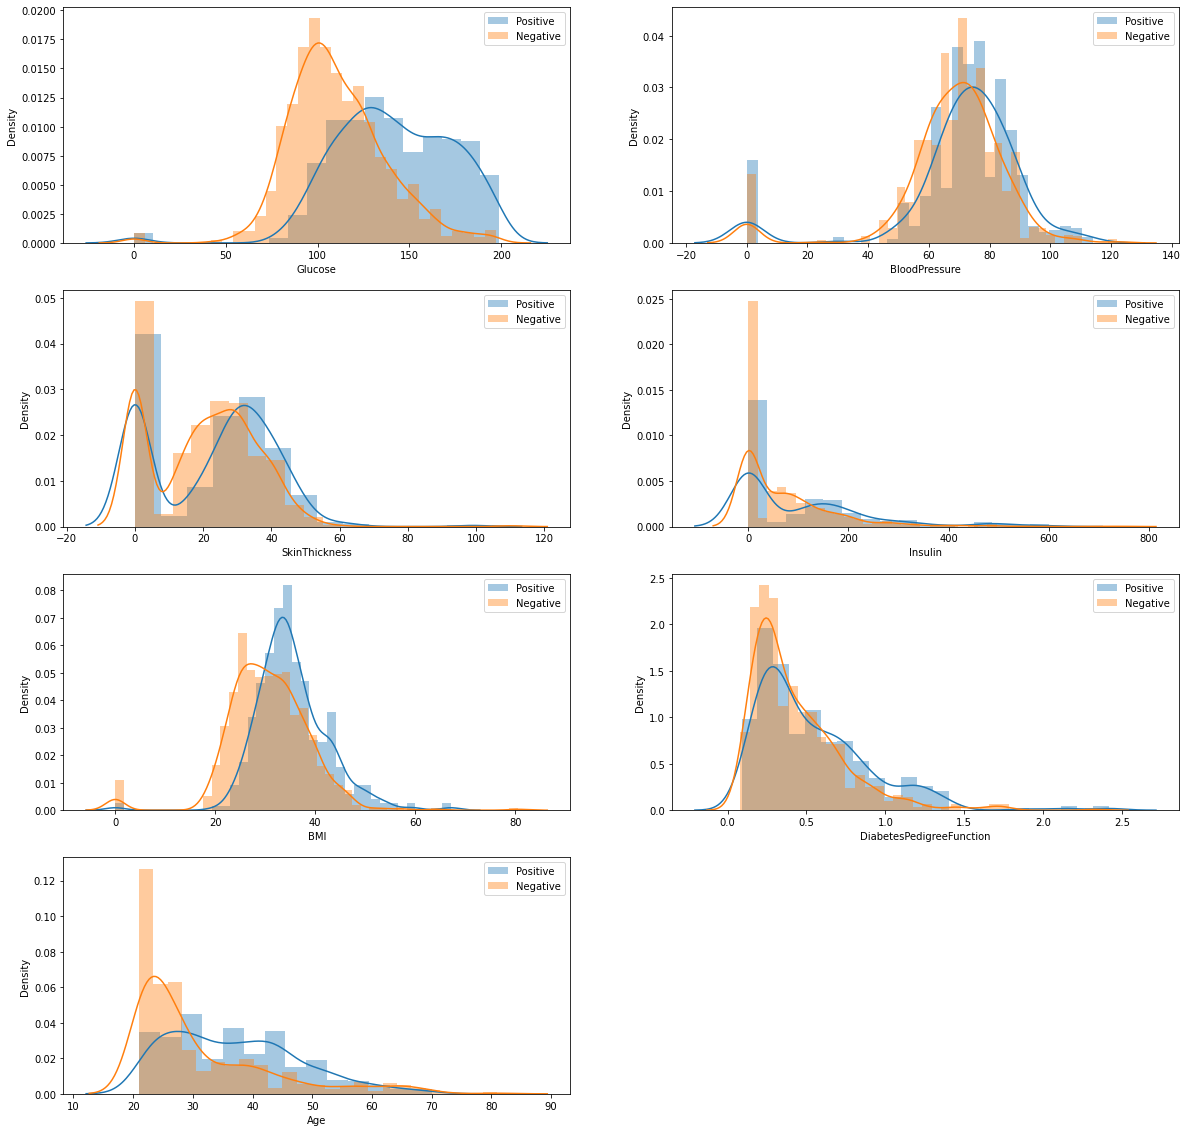

In [6]:
fig=plt.figure(figsize=(20,20))
for i,col in enumerate(df.drop(['Pregnancies','Outcome'],axis=1)):
    ax=fig.add_subplot(4,2,i+1)
    ax1=sns.distplot(df[col][df['Outcome']==1],label='Positive')
    sns.distplot(df[col][df['Outcome']==0],label='Negative',ax=ax1)
    plt.legend()

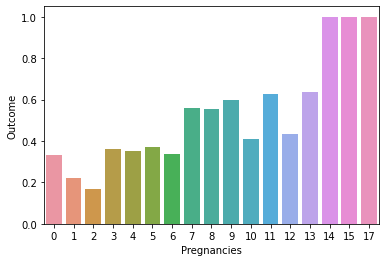

In [7]:
sns.barplot(x='Pregnancies',y='Outcome',data=df,ci=None)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
featureList = ['Glucose', 'BloodPressure',	'SkinThickness',	'Insulin',	'BMI']
for col in featureList:
  df[col] = df[col].replace({ 0 : df[col].mean() })

In [11]:
df.loc[ df.Pregnancies > 6, 'Pregnancies' ] = 6
df.loc[ df.Glucose < 70 , 'Glucose' ] = 70     
df.loc[ df.BloodPressure < 60 , 'BloodPressure' ] = 60 
df.loc[ df.BMI < 18 , 'BMI' ] = 18 
df.loc[ df.BMI > 40 , 'BMI' ] = 40

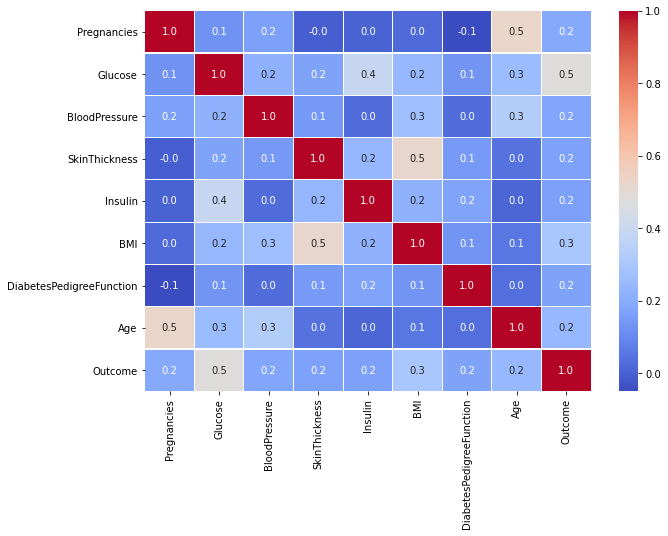

In [12]:
plt.figure(figsize=(10, 7))

sns.heatmap(df.corr(), annot=True, linewidths=0.2, fmt='.1f', cmap='coolwarm') # cmap='RdYlBu'
plt.show()

In [13]:
y = df['Outcome']
X = df.drop(['Outcome'], axis=1, inplace=False)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.000000,35.000000,79.534946,33.6,0.127,47
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23
2,0,145.0,68.959677,20.908602,79.534946,40.0,0.630,31
3,0,135.0,68.000000,42.000000,250.000000,40.0,0.365,24
4,1,139.0,62.000000,41.000000,480.000000,40.0,0.536,21


In [14]:
TrainPerc=[40,30,20]

train_shape = []
test_shape = []

TP=[]
FN=[]
TN=[]
FP=[]

acc=[]
prec=[]
recall=[]
F1=[]
sens=[]
spec=[]
FPR=[]
FNR=[]
NPV=[]
FDR=[]
MCC=[]

In [15]:
for i in TrainPerc:
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = i/100,random_state = 0)
    
    train_shape.append(X_train.shape[0])
    test_shape.append(X_test.shape[0])

    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)

    confusion = confusion_matrix(y_test, y_predicted)

    TP.append(confusion[1, 1])
    TN.append(confusion[0, 0])
    FP.append(confusion[0, 1])
    FN.append(confusion[1, 0])

    acc.append(accuracy_score(y_test, y_predicted))
    prec.append(TP[-1] / float(FP[-1] + TP[-1]))
    recall.append(TP[-1] / float(FN[-1] + TP[-1]))
    F1.append(2 * (prec[-1] * recall[-1]) / (prec[-1] +recall[-1]))
    sens.append(TP[-1]/ float(FN[-1] + TP[-1]))
    spec.append(TN[-1]/ float(TN[-1] + FP[-1]))
    FPR.append(FP[-1] / float(TN[-1] + FP[-1]))
    FNR.append(FN[-1] / float(FN[-1] + TP[-1]))
    NPV.append(TN[-1] / float(TN[-1] + FN[-1]))
    FDR.append(FP[-1] / float(FP[-1] + TP[-1]))
    MCC.append( ( (TP[-1]*TN[-1])-(FP[-1]*FN[-1]) ) / ((TP[-1]+FP[-1])*(TP[-1]+FN[-1])*(TN[-1]+FP[-1])*(TN[-1]+FN[-1]))**0.5 )

In [16]:
data2 = pd.DataFrame({'Traning Percentage':TrainPerc,
                      'Train Samples':train_shape,
                      'Test Samples':test_shape, 
                      'True Positives':TP,
                      'True Negatives':TN,
                      'False Positives':FP,
                      'False Negatives':FN,
                      'Accuracy':acc, 
                      'Precison':prec,
                      'Recall':recall,
                      'F1Measure':F1,
                      'Sensitivity':sens,
                      'Specificity':spec,
                      'FPR':FPR,
                      'FNR':FNR,
                      'NPV':NPV,
                      'FDR':FDR,
                      'MCC':MCC })
data2.head()

,Traning Percentage,Train Samples,Test Samples,True Positives,True Negatives,False Positives,False Negatives,Accuracy,Precison,Recall,F1Measure,Sensitivity,Specificity,FPR,FNR,NPV,FDR,MCC
0,40,446,298,53,153,45,47,0.691275,0.540816,0.530000,0.535354,0.530000,0.772727,0.227273,0.470000,0.765000,0.459184,0.304268
1,30,520,224,36,119,31,38,0.691964,0.537313,0.486486,0.510638,0.486486,0.793333,0.206667,0.513514,0.757962,0.462687,0.287444
2,20,595,149,31,81,20,17,0.751678,0.607843,0.645833,0.626263,0.645833,0.801980,0.198020,0.354167,0.826531,0.392157,0.441042


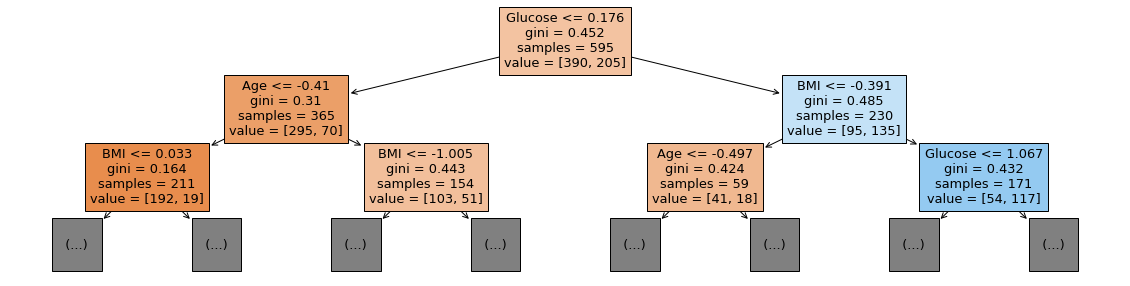

In [18]:
plt.figure(figsize=(20,5))
plot_tree(clf,feature_names=df.drop('Outcome',axis=1).columns,max_depth=2, filled=True)
plt.show()